# 1. Introdução

O eterno embate entre popularidade e qualidade de um produto midiático sempre foi um tópico de interesse daqueles que o consomem. A maioria das pessoas gostaria que aquele produto que tanto admira seja considerado de qualidade, afinal ninguém gosta de ouvir que uma obra adorada é inferior. Porém, muitos trabalhos independem da opinião de um especialista para ganharem o coração do público. Os Video Games não são uma excessão. Enquanto jogos avaliados por críticos especialistas como obras primas costumam fazer sucesso, existem também os que são considerados medíocres e mesmo assim vendem milhões pelo mundo.

De outro modo, podemos analisar também mais um aspecto que influencia enormemente no êxito comercial de um Video Game, seu gênero. É sabido que jogos violentos normalmente são o centro das atenções, mas existem vários outros tipos de jogos que bombam no mercado. Isso também traz uma reflexão em relação às populações que consomem a maior quantidade de um determinado gênero de entretenimento, já que de uma forma ou de outra, esses elementos influenciam na formação do jogador.

# 2. Metodologia

Para analisar essas relações, utilizamos uma [base de dados](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/version/2) sobre Video Games que venderam pelo menos 100 000 cópias, entre 1980 e 2016, gerada a partir do site [VGChartz](http://www.vgchartz.com/). Essa base de dados inclui os seguintes elementos:

•	Name - Nome do Jogo

•	Platform - Console para o qual o jogo foi laçado

•	Year - Ano de lançamento do jogo

•	Genre - Gênero do jogo

•	Publisher - Empresa responsável por publicar o jogo

•	NA_Sales - Vendas na América do Norte (em milhões)

•	EU_Sales - Vendas na Europa (em milhões)

•	JP_Sales - Vendas no Japão (em milhões)

•	Other_Sales - Vendas no resto do mundo (em milhões)

•	Global_Sales - Vendas totais no mundo

•	Critic_score - Pontuação agregada compilada pelos funcionários do site [Metacritic](https://www.metacritic.com/)

•	Critic_count - Número de críticos usado para gerar Critic_score

•	User_score - Pontuação dada pelos usuários do site Metacritic

•	User_count - Número de usuários que votaram na User_score

•	Developer - Desenvolvedores do jogo

•	Rating - Classificação indicativa dada pela [ESRB](https://www.esrb.org/) (Entertainment Software Rating Board)

O modelo utilizado para avaliar a relação entre a avaliação dos críticos e as vendas globais foi a regressão linear simples, já que pelos plots abaixo a relação parece aproximadamente linear, além de que queríamos relacionar aprenas esses dois aspectos. Já para vermos como o gênero influencia nas vendas em cada parte do mundo, utilizamos um classificador kNN, que tentaria prever a qual gênero (classe) pertence o jogo de acordo com suas vendas nessas regiões geográficas.

# 3. Resultados

# 3.1. Caracterização

Inicialmente temos a apresentação dos dados, em forma de tabela para melhor visualização. Os jogos estão ordenados de forma decrescente em relação às vendas globais, e de cara já podemos ver a disparidade entre o primeiro e o segundo colocados. O primeiro, _Wii Sports_, tem mais do que o dobro de cópias vendidas do que o segundo, _Super Mario Bros_. Isso occoreu pois o _Wii Sports_ era vendido juntamente com o seu console, _Nintendo Wii_, assim essas vendas representam mais o consumo do console do que do jogo específico.

In [1]:
import pandas as pd

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

df = df.drop([5936, 14086, 16222, 16385]) # Removendo Jogos de 2017 e 2020 
#2020 -> 5936
#2017 -> 14086, 16222, 16385

Agora, damos uma olhada um pouco mais profunda nas estatísticas dos dados. Vemos que grade parte dos jogos foi lançada de 2003 a 2010, talvez porque a indústria dos Video Games não fosse tão forte antes desse período. ...

In [2]:
df.describe()
#DÚVIDA: PQ NÃO APARECE A User_Score AQUI?

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,0.533649,68.967679,26.360821,162.229908
std,5.877050,0.813604,0.503339,0.308853,0.186731,1.548104,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [3]:
import matplotlib.pyplot as plt

df1 = df.copy()
df1 = df1.groupby(['Platform']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por plataforma')
df1.plot.bar()

fig_size = [0]*2
fig_size[0] = 15
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

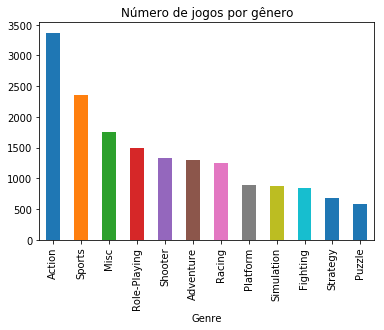

In [4]:
df1 = df.copy()
df1 = df1.groupby(['Genre']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por gênero')
df1.plot.bar()

fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

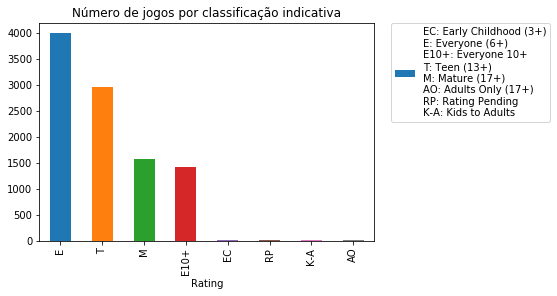

In [5]:
df1 = df.copy()
df1 = df1.groupby(['Rating']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por classificação indicativa')
df1.plot.bar(label='EC: Early Childhood (3+)\nE: Everyone (6+)\nE10+: Everyone 10+\nT: Teen (13+)\nM: Mature (17+)\nAO: Adults Only (17+)\nRP: Rating Pending\nK-A: Kids to Adults')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

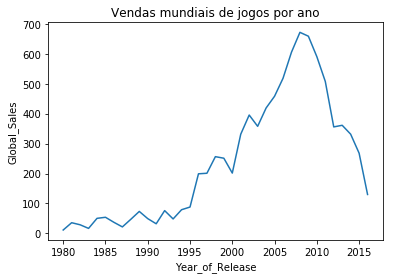

In [6]:
df1 = df.copy()
df1 = df1[['Year_of_Release', 'Global_Sales']]
df1 = df1.groupby('Year_of_Release').sum()
plt.title('Vendas mundiais de jogos por ano')
plt.xlabel('Year_of_Release')
plt.ylabel('Global_Sales')
plt.plot(df1)

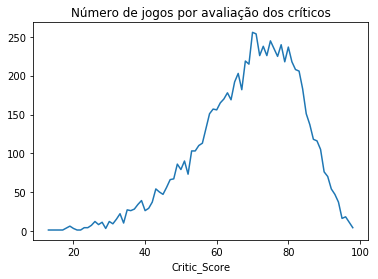

In [7]:
df1 = df.copy()
df1 = df1.groupby(['Critic_Score']).count()
df1 = df1['Name']
df1
plt.title('Número de jogos por avaliação dos críticos')
plt.xlabel('Critic_Score')
plt.plot(df1)

# 3.2. Previsão

# 3.2.1. P1: Maior número de vendas implica em maior qualidade?

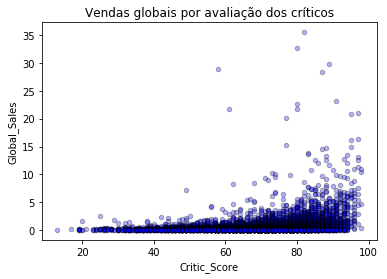

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

new_df = df.copy()
new_df = new_df.drop([0])
# Removi o jogo Wii Sports porque ele é vendido juntamente com o console Nintendo Wii,
# então suas vendas eram absurdamente maiores do que o resto
new_df = new_df.dropna() # Removi os valores NaN
# Plotei as variáveis para ter uma noção inicial
new_df.plot.scatter(x='Critic_Score', y='Global_Sales', color='blue', alpha=0.3, edgecolor='k')
plt.title('Vendas globais por avaliação dos críticos')

fig_size[0] = 10
fig_size[1] = 15
#fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size

In [9]:
from sklearn.model_selection import train_test_split

# Escolhi qual variável será X e qual será y e as separei em treino e teste
X = new_df['Critic_Score'].values
X = X.reshape(-1, 1)
y = new_df['Global_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Modelo da regressão linear
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Avaliando o modelo
print('Coeficiente: ', model.coef_)
print('Intercepto: ', model.intercept_)
print("Erro quadrático médio: %.2f" % mean_squared_error(y_test, prediction))
print('r2: %.2f' % r2_score(y_test, prediction)) # r2 = 1: previsão perfeita

Coeficiente:  [0.03451127]
Intercepto:  -1.6456524305073161
Erro quadrático médio: 1.72
r2: 0.08


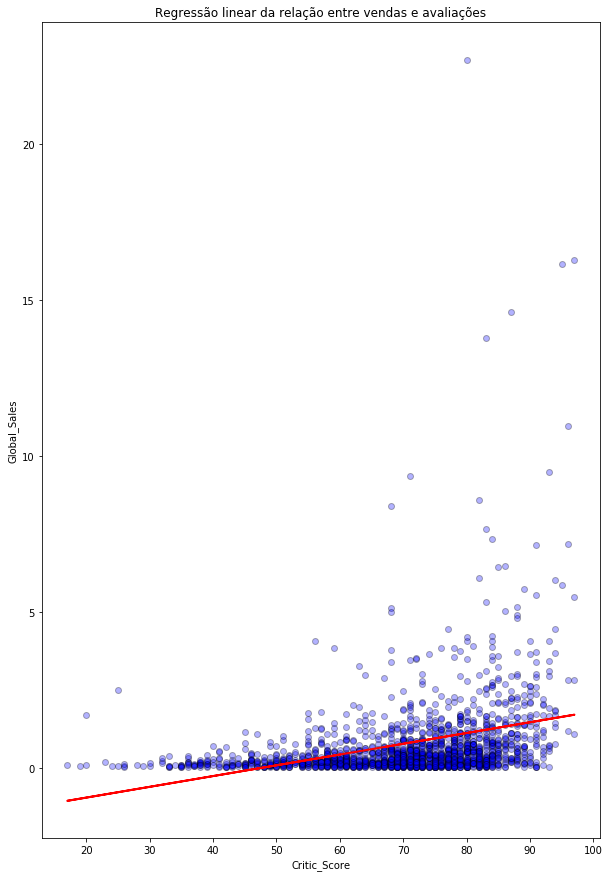

In [11]:
# Plotando o resultado
plt.scatter(X_test, y_test,  color='blue', alpha=0.3, edgecolor='k')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.title('Regressão linear da relação entre vendas e avaliações')
plt.xlabel('Critic_Score')
plt.ylabel('Global_Sales')

plt.show()

Hipótese nula: qualidade não influencia nas vendas (chance igual de vender sendo o jogo bom ou não) -> distribuição uniforme

In [12]:
from sklearn.model_selection import permutation_test_score

# Teste de hipótese por permutação
score, permutation_scores, pvalue = permutation_test_score(model, X_test, prediction, cv=3)
print("Pontuação da classificação %s \np-valor : %s" % (score, pvalue))

Pontuação da classificação 1.0 
p-valor : 0.009900990099009901


Como o p-valor é muito pequeno podemos inferir que a hipótese nula não é válida, ou seja, as vendas e a qualidade do jogo tem relação

# 3.2.2. P2: Relação entre vendas em regiões do mundo e gênero do jogo

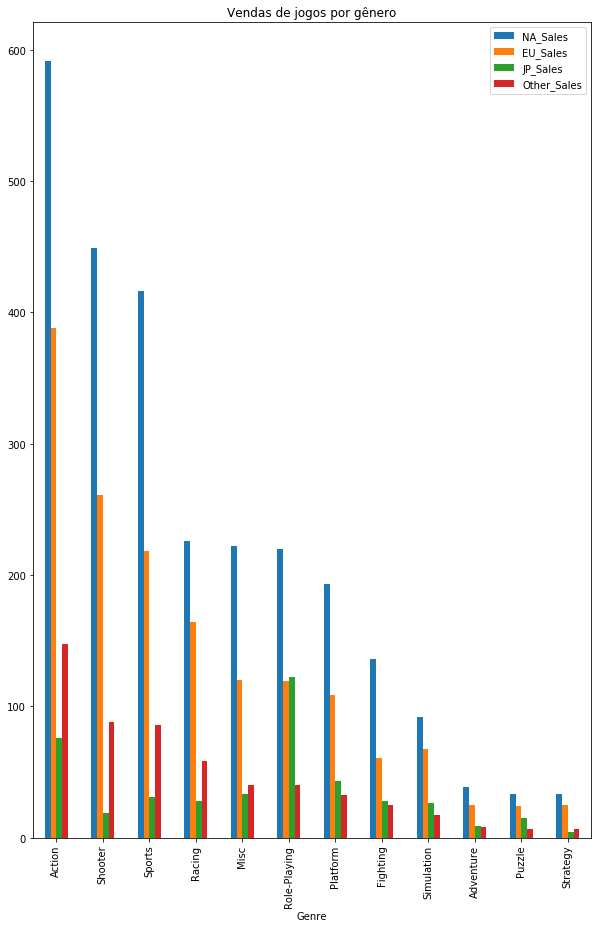

In [13]:
d = ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df1 = new_df[d]
df1 = df1.groupby(['Genre']).sum()
df1 = df1.sort_values(by='NA_Sales', ascending=False)
df1.plot.bar()
plt.title('Vendas de jogos por gênero')

fig_size[0] = 15
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [15]:
from sklearn.linear_model import LogisticRegression
genres = ["Action","Adventure","Fighting","Misc","Platform","Puzzle","Racing","Role-Playing","Shooter","Simulation","Sports","Strategy"]
teste_df = [0]*len(genres)
for i in range(len(genres)):
    teste_df[i] = new_df[new_df['Genre'] == genres[i]].sample(1136, replace=True)

sample_df = pd.concat(teste_df)

X = sample_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].values
y = sample_df['Genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=40, weights='distance')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [17]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, prediction, average='macro')
print('Precisão: ', precision, '\nRevocação: ', recall, '\nF1: ', fscore)
print('Pontuação da classificação: ', model.score(X_test, y_test))

Precisão:  0.6231185485659977 
Revocação:  0.6144503179109889 
F1:  0.6080498447320858
Pontuação da classificação:  0.6144366197183099


([<matplotlib.axis.YTick at 0x15f0406af98>,
 <a list of 12 Text yticklabel objects>)

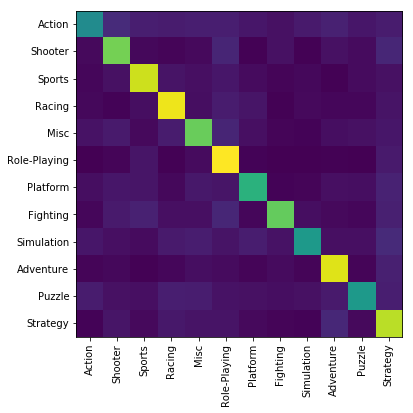

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.imshow(confusion_matrix(y_test, prediction))
labels = df1.index
labels = pd.Series(labels)
plt.imshow(confusion_matrix(y_test, prediction))
plt.xticks(labels.index, labels, rotation=90)
plt.yticks(labels.index, labels)

Hipótese nula: gênero não influencia nas vendas do jogo pelo mundo (os jogos de cada gênero vendem uniformemente)

In [19]:
# Teste de hipótese por permutação
score, permutation_scores, pvalue = permutation_test_score(model, X_test, prediction, cv=3)
print("Pontuação da classificação %s \np-valor : %s" % (score, pvalue))

Pontuação da classificação 0.6924497464535667 
p-valor : 0.009900990099009901


Como o p-valor é muito pequeno podemos inferir que a hipótese nula não é válida, ou seja, as vendas e o gênero do jogso tem relação

# 4. Conclusões